In [1]:
import pandas as pd

In [4]:
df=pd.read_excel("C:\\Users\\DELL\\Downloads\\Cricketforcast.xlsx")

In [5]:
df.head()

,Outlook,Tempearature,Humidity,Windy,Play
0,Sunny,Hot,Hot,False,No
1,Sunny,Hot,Hot,True,No
2,Overcast,Hot,Hot,False,Yes
3,Rainny,Mild,Hot,False,Yes
4,Rainny,NaN,Normal,False,Yes


In [7]:
df.shape

(14, 5)

# Data Preprocessing

In [15]:
df.isnull().any()

Outlook          True
Tempearature     True
Humidity        False
Windy           False
Play            False
dtype: bool

In [16]:
df.isnull().sum()

Outlook         1
Tempearature    2
Humidity        0
Windy           0
Play            0
dtype: int64

In [20]:
df['Outlook'].mode()

0    Sunny
dtype: object

In [21]:
df['Outlook']=df['Outlook'].fillna('Sunny')

In [28]:
df['Tempearature'].mode()

0    Mild
dtype: object

In [29]:
df['Tempearature']=df['Tempearature'].fillna('Mild')

In [30]:
df.isnull().sum()

Outlook         0
Tempearature    0
Humidity        0
Windy           0
Play            0
dtype: int64

In [32]:
df.columns

Index(['Outlook', 'Tempearature', 'Humidity', 'Windy', 'Play'], dtype='object')

# Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
df[['Outlook']]=LabelEncoder().fit_transform(df['Outlook'])

In [47]:
df[['Tempearature']]=LabelEncoder().fit_transform(df['Tempearature'])

In [48]:
df[['Humidity']]=LabelEncoder().fit_transform(df['Humidity'])

In [49]:
df[['Windy']]=LabelEncoder().fit_transform(df['Windy'])

In [50]:
df[['Play']]=LabelEncoder().fit_transform(df['Play'])


# EDA

In [51]:
import seaborn as sns

In [52]:
tc=df.corr()

In [53]:
tc

,Outlook,Tempearature,Humidity,Windy,Play
Outlook,1.000000,0.369970,-1.714986e-01,2.475369e-02,-0.588006
Tempearature,0.369970,1.000000,-1.961161e-01,-3.113762e-01,0.233882
Humidity,-0.171499,-0.196116,1.000000e+00,1.602469e-17,0.447214
Windy,0.024754,-0.311376,1.602469e-17,1.000000e+00,-0.258199
Play,-0.588006,0.233882,4.472136e-01,-2.581989e-01,1.000000


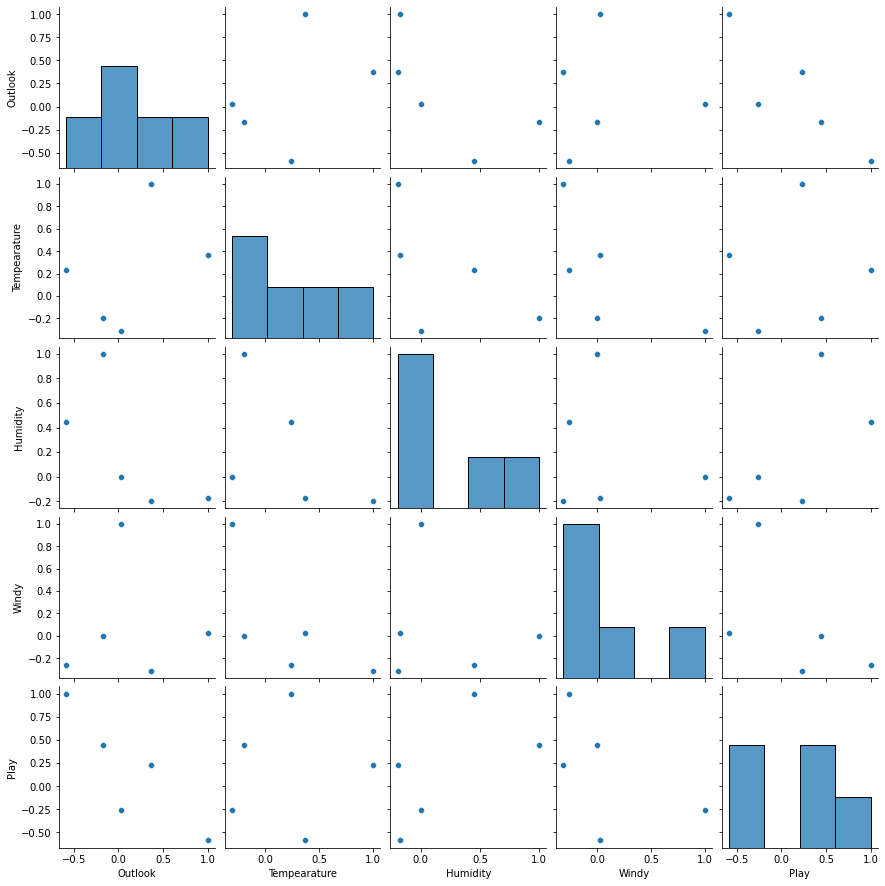

In [55]:
sns.pairplot(tc)

# Define x and y

In [60]:
df.columns

Index(['Outlook', 'Tempearature', 'Humidity', 'Windy', 'Play'], dtype='object')

In [61]:
x=df[['Outlook', 'Tempearature', 'Humidity', 'Windy']]

In [62]:
x

,Outlook,Tempearature,Humidity,Windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,2,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,2,1,0
9,1,2,1,0


In [63]:
y=df[['Play']]

In [64]:
y

,Play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


# Model development

In [65]:
from sklearn.model_selection  import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [70]:
x_train

,Outlook,Tempearature,Humidity,Windy
6,0,0,1,1
5,1,0,1,1
9,1,2,1,0
1,2,1,0,1
0,2,1,0,0
4,1,2,1,0
12,0,1,1,0
7,2,2,0,0
2,0,1,0,0


In [71]:
y_train

,Play
6,1
5,0
9,1
1,0
0,0
4,1
12,1
7,0
2,1


In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model=LogisticRegression()

In [74]:
LogisticRegression()

LogisticRegression()

In [75]:
model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [76]:
y_pred=model.predict(x_test)

In [77]:
y_pred

array([1, 0, 1, 0, 0], dtype=int64)

In [78]:
from sklearn import metrics

In [79]:
cm=metrics.confusion_matrix(y_test,y_pred)

In [80]:
cm

array([[1, 0],
       [2, 2]], dtype=int64)

In [83]:
metrics.accuracy_score(y_test,y_pred)

0.6

In [84]:
metrics.recall_score(y_test,y_pred)

0.5